<a href="https://colab.research.google.com/github/stellar4554t/heas/blob/main/Quantum_Espresso_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the Quantum Espresso Binary

In [1]:
%%capture
# Clone the QE git
!git clone https://github.com/QEF/q-e.git
# Install the dependencies
!apt-get install -y libfftw3-3 libfftw3-dev libfftw3-doc #libxc-dev libblas-dev liblapack-dev openmpi-bin libopenmpi-dev
# enter the q-e folder
%cd q-e
# run the configure file
#!!DFLAGS='-D__OPENMP -D__FFTW3 -D__MPI -D__SCALAPACK' FFT_LIBS='-lfftw3'  ./configure --enable-openmp
!!DFLAGS='-D__FFTW3 ' FFT_LIBS='-lfftw3'  ./configure # Khi cài đặt ...-dev rồi thì phần mềm có thể tự phát hiện mà không cần lập biến để khai báo.

Run the cell to make `pw.x` binary
If you need to make any other binary like `dos.x` or `bands.x`. Replace the `pw` with `dos` or `bands`

In [2]:
%%capture
!make pw #computation time ~5-7 minutes

In [3]:
# Liệt kê nội dung thư mục bin
!ls /content/q-e/bin

cell2ibrav.x  ev.x	    kpoints.x  pwi2xsf.x  rism1d.x
dist.x	      ibrav2cell.x  manypw.x   pw.x	  scan_ibrav.x


Create a folder named "silicon" to download and keep all the files needed including the input files and pseudopotential files.

After creating the folder, upload the pseudopotential file in this folder.

In [4]:
%cd /content
!mkdir cantor-alloys

/content


In [5]:
# Navigating into your folder.
%cd /content/cantor-alloys

/content/cantor-alloys


In [6]:
!wget --content-disposition -O Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF "https://pseudopotentials.quantum-espresso.org/upf_files/Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF"
!wget --content-disposition -O Mn.pbesol-spn-rrkjus_psl.0.3.1.UPF "https://pseudopotentials.quantum-espresso.org/upf_files/Mn.pbesol-spn-rrkjus_psl.0.3.1.UPF"
!wget --content-disposition -O Co.pbesol-spn-rrkjus_psl.0.3.1.UPF "https://pseudopotentials.quantum-espresso.org/upf_files/Co.pbesol-spn-rrkjus_psl.0.3.1.UPF"
!wget --content-disposition -O Cr.pbesol-spn-rrkjus_psl.1.0.0.UPF "https://pseudopotentials.quantum-espresso.org/upf_files/Cr.pbesol-spn-rrkjus_psl.1.0.0.UPF"
!wget --content-disposition -O Ni.pbesol-spn-rrkjus_psl.1.0.0.UPF "https://pseudopotentials.quantum-espresso.org/upf_files/Ni.pbesol-spn-rrkjus_psl.1.0.0.UPF"

--2026-01-04 12:22:46--  https://pseudopotentials.quantum-espresso.org/upf_files/Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF
Resolving pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)... 51.77.118.191
Connecting to pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)|51.77.118.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1744395 (1.7M)
Saving to: ‘Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF’

Fe.pbesol-spn-rrkju 100%[===================>]   1.66M  1.90MB/s    in 0.9s    

2026-01-04 12:22:47 (1.90 MB/s) - ‘Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF’ saved [1744395/1744395]

--2026-01-04 12:22:48--  https://pseudopotentials.quantum-espresso.org/upf_files/Mn.pbesol-spn-rrkjus_psl.0.3.1.UPF
Resolving pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)... 51.77.118.191
Connecting to pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)|51.77.118.191|:443... connected.
HTTP request

# Prepare the input file

In [17]:
qe_input = """
&control
  title='cantor_vcrelax',
  calculation= 'vc-relax',
  restart_mode='from_scratch',
  nstep=1000,
  iprint=100,
  prefix='cantor_vcrelax',
  ! set pseudo_dir and outdir to suitable directories
  pseudo_dir = '/content/cantor-alloys/',
  outdir='/content/cantor-alloys/',
/
&system
  ibrav = 0 , nat = 14, ntyp = 5,
  ecutwfc = 45, ecutrho = 300,
  occupations = 'smearing',
  smearing = 'mv',          ! Marzari-Vanderbilt (tốt cho kim loại)
  degauss = 0.02,           ! Độ rộng của việc làm mịn (đơn vị Rydberg)
  ! Bỏ nr1b, nr2b, nr3b (chỉ dùng cho CP)
/
&electrons
  conv_thr = 1.0d-8, ! Ngưỡng hội tụ năng lượng (tăng độ chính xác)
  mixing_beta = 0.2
/
&ions
  ion_dynamics = 'bfgs', ! Phương pháp tối ưu hóa vị trí ion
/
&cell
  cell_dynamics = 'bfgs', ! Phương pháp tối ưu hóa ô đơn vị
  press = 0.0, ! Áp suất, thường là 0.0 kbar
  cell_factor = 2.0,
/
ATOMIC_SPECIES
 Fe 55.845 Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF
 Cr 51.996 Cr.pbesol-spn-rrkjus_psl.1.0.0.UPF
 Mn 54.938 Mn.pbesol-spn-rrkjus_psl.0.3.1.UPF
 Co 58.933 Co.pbesol-spn-rrkjus_psl.0.3.1.UPF
 Ni 58.693 Ni.pbesol-spn-rrkjus_psl.1.0.0.UPF
ATOMIC_POSITIONS angstrom
  Cr    1.980000    1.980000    1.980000
  Cr    3.740002    3.740002    1.980000
  Mn    1.980000    3.740002    3.740002
  Fe    3.740002    1.980000    3.740002
  Cr    5.500004    1.980000    1.980000
  Co    5.500004    3.740002    3.740002
  Mn    1.980000    5.500004    1.980000
  Fe    3.740002    5.500004    3.740002
  Ni    5.500004    5.500004    1.980000
  Co    1.980000    1.980000    5.500004
  Cr    3.740002    3.740002    5.500004
  Cr    5.500004    1.980000    5.500004
  Mn    1.980000    5.500004    5.500004
  Fe    5.500004    5.500004    5.500004
CELL_PARAMETERS angstrom
5.500004 0.000000 0.000000
0.000000 5.500004 0.000000
0.000000 0.000000 5.500004
K_POINTS automatic
4 4 4 0 0 0
"""

# We write the input script
with open("cantor300Kvc.scf.in", "w") as f:
    f.write(qe_input)

In [18]:
! /content/q-e/bin/pw.x  -in cantor300Kvc.scf.in > cantor300Kvc.scf.out

^C


In [ ]:
qe_input = """
&control
  title='cantor300K',
  calculation= 'cp',
  restart_mode='from_scratch',
  ndw=50,
  nstep=10000,
  iprint=100,
  isave=1000,
  disk_io = 'low',
  tprnfor=.TRUE.,
  tstress=.TRUE.,
  dt=2.0d0,
  prefix='cantor300K',
  ! this is a comment: you can comment out variables
  ! set pseudo_dir and outdir to suitable directories
  pseudo_dir = '/content/cantor-alloys/',
  outdir='/content/cantor-alloys/',
/
&system
  ibrav = 0 , nat = 32, ntyp = 5,
  ecutwfc = 45, ecutrho = 300, nr1b = 60, nr2b = 60, nr3b = 60
/
&electrons
electron_dynamics = 'verlet',
emass = 400.0d0,
/
&ions
ion_dynamics = 'verlet',
ion_temperature = 'nose',
fnosep = 5.d0,
nhpcl = 3,
ion_velocities = 'zero',
pot_extrapolation = 'second_order',
wfc_extrapolation = 'second_order',
tempw=300.d0
/
ATOMIC_SPECIES
 Fe 55.845 Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF
 Cr 51.996 Cr.pbesol-spn-rrkjus_psl.1.0.0.UPF
 Mn 54.938 Mn.pbesol-spn-rrkjus_psl.0.3.1.UPF
 Co 58.933 Co.pbesol-spn-rrkjus_psl.0.3.1.UPF
 Ni 58.693 Ni.pbesol-spn-rrkjus_psl.1.0.0.UPF
ATOMIC_POSITIONS angstrom
Co    1.980000    1.980000    1.980000
Cr    3.740002    3.740002    1.980000
Mn    1.980000    3.740002    3.740002
Fe    3.740002    1.980000    3.740002
Cr    5.500004    1.980000    1.980000
Ni    7.260006    3.740002    1.980000
Co    5.500004    3.740002    3.740002
Co    7.260006    1.980000    3.740002
Mn    1.980000    5.500004    1.980000
Cr    3.740002    7.260006    1.980000
Mn    1.980000    7.260006    3.740002
Fe    3.740002    5.500004    3.740002
Ni    5.500004    5.500004    1.980000
Ni    7.260006    7.260006    1.980000
Cr    5.500004    7.260006    3.740002
Mn    7.260006    5.500004    3.740002
Co    1.980000    1.980000    5.500004
Cr    3.740002    3.740002    5.500004
Co    1.980000    3.740002    7.260006
Fe    3.740002    1.980000    7.260006
Cr    5.500004    1.980000    5.500004
Ni    7.260006    3.740002    5.500004
Cr    5.500004    3.740002    7.260006
Ni    7.260006    1.980000    7.260006
Mn    1.980000    5.500004    5.500004
Mn    3.740002    7.260006    5.500004
Ni    1.980000    7.260006    7.260006
Cr    3.740002    5.500004    7.260006
Fe    5.500004    5.500004    5.500004
Cr    7.260006    7.260006    5.500004
Co    5.500004    7.260006    7.260006
Fe    7.260006    5.500004    7.260006
CELL_PARAMETERS angstrom
7.260006 0.000000 0.000000
0.000000 7.260006 0.000000
0.000000 0.000000 7.260006
"""

# We write the input script
with open("cantor300K.cp.in", "w") as f:
    f.write(qe_input)

Visualize the silicon atoms

# Run the DFT code

Note: Check the directories for pseudopotential file and output file!

In [ ]:
#!mpirun --allow-run-as-root --oversubscribe -np 2 /content/q-e/bin/cp.x  -in cantor.cp.in > cantor.cp.out

In [ ]:
! /content/q-e/bin/cp.x  -in cantor300K.cp.in > cantor300K.cp.out

^C


# See the output file

In [ ]:
!cat cantor400K.cp.out


     Program CP v.7.5 starts on 11Nov2025 at  0:24:51 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
         "P. Giannozzi et al., J. Chem. Phys. 152 154105 (2020);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Serial version
     5707 MiB available memory on the printing compute node when the environment starts

open_input_file: fatal error opening cantor.cp.in

 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
     Error in routine read_input (1):
     opening input file
 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

     stopping ...


In [ ]:
qe_input = """
&control
  title='cantor700K',
  calculation= 'cp',
  restart_mode='from_scratch',
  ndw=50,
  nstep=10000,
  iprint=100,
  isave=1000,
  disk_io = 'low',
  tprnfor=.TRUE.,
  tstress=.TRUE.,
  dt=2.0d0,
  prefix='cantor700K',
  ! this is a comment: you can comment out variables
  ! set pseudo_dir and outdir to suitable directories
  pseudo_dir = '/content/cantor-alloys/',
  outdir='/content/cantor-alloys/',
/
&system
  ibrav = 0 , nat = 14, ntyp = 5,
  ecutwfc = 45, ecutrho = 300, nr1b = 32, nr2b = 32, nr3b = 32
/
&electrons
electron_dynamics = 'verlet',
emass = 450.0d0,
/
&ions
ion_dynamics = 'verlet',
ion_temperature = 'nose',
fnosep = 5.d0,
nhpcl = 3,
ion_velocities = 'zero',
pot_extrapolation = 'second_order',
wfc_extrapolation = 'second_order',
tempw=700.d0
/
ATOMIC_SPECIES
 Fe 55.845 Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF
 Cr 51.996 Cr.pbesol-spn-rrkjus_psl.1.0.0.UPF
 Mn 54.938 Mn.pbesol-spn-rrkjus_psl.0.3.1.UPF
 Co 58.933 Co.pbesol-spn-rrkjus_psl.0.3.1.UPF
 Ni 58.693 Ni.pbesol-spn-rrkjus_psl.1.0.0.UPF
ATOMIC_POSITIONS angstrom
  Cr    1.980000    1.980000    1.980000
  Cr    3.740002    3.740002    1.980000
  Mn    1.980000    3.740002    3.740002
  Fe    3.740002    1.980000    3.740002
  Cr    5.500004    1.980000    1.980000
  Co    5.500004    3.740002    3.740002
  Mn    1.980000    5.500004    1.980000
  Fe    3.740002    5.500004    3.740002
  Ni    5.500004    5.500004    1.980000
  Co    1.980000    1.980000    5.500004
  Cr    3.740002    3.740002    5.500004
  Cr    5.500004    1.980000    5.500004
  Mn    1.980000    5.500004    5.500004
  Fe    5.500004    5.500004    5.500004
CELL_PARAMETERS angstrom
5.500004 0.000000 0.000000
0.000000 5.500004 0.000000
0.000000 0.000000 5.500004
"""

# We write the input script
with open("cantor700K.cp.in", "w") as f:
    f.write(qe_input)

In [ ]:
! /content/q-e/bin/cp.x  -in cantor700K.cp.in > cantor700K.cp.out

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP 0


In [ ]:
# Định nghĩa hằng số chuyển đổi
# 1 Atomic Unit (Bohr) = 0.529177210903 Angstrom (Å)
# Nguồn: CODATA 2018
AU_TO_ANGSTROM = 0.529177210903

def convert_cpmd_pos_to_xyz(pos_file: str, xyz_file: str, atoms: list[str]):
    """
    Chuyển đổi file tọa độ .pos (định dạng CPMD) sang định dạng .xyz chuẩn.
    Thực hiện chuyển đổi đơn vị tọa độ từ đơn vị nguyên tử (a.u.) sang Angstrom (Å).

    :param pos_file: Đường dẫn đến file CPMD .pos đầu vào.
    :param xyz_file: Đường dẫn đến file .xyz đầu ra.
    :param atoms: Danh sách chuỗi tên nguyên tử theo thứ tự.
    """
    natoms = len(atoms)

    # Mở file đầu vào và đầu ra
    try:
        with open(pos_file, "r") as fin, open(xyz_file, "w") as fout:
            lines = fin.readlines()
            step = 0
            i = 0

            print(f"Bắt đầu chuyển đổi {natoms} nguyên tử từ {pos_file} sang {xyz_file}...")

            while i < len(lines):
                parts = lines[i].strip().split()

                # Dòng header (ví dụ: "100 0.00483777")
                # parts[0] là số bước (dummy value trong pos), parts[1] là thời gian (ví dụ: ps)
                if len(parts) == 2 and parts[0].isdigit():
                    step += 1
                    time_value = parts[1]

                    # Ghi dòng header XYZ (số nguyên tử và dòng comment)
                    fout.write(f"{natoms}\nStep {step} time={time_value} (units: ps), Coordinates in Angstrom\n")

                    coords_str = []

                    # Đọc natoms dòng tiếp theo, mỗi dòng chứa 3 giá trị tọa độ (X, Y, Z)
                    # Tọa độ được lưu dưới dạng chuỗi
                    for j in range(1, natoms + 1):
                        current_line_index = i + j
                        if current_line_index < len(lines):
                            # Thêm 3 tọa độ từ dòng này vào danh sách
                            coords_str.extend(lines[current_line_index].strip().split())
                        else:
                            print(f"Lỗi: Không đủ dòng tọa độ cho bước {step}. Dừng lại.")
                            return

                    # Chuyển đổi tọa độ: từ chuỗi -> float (a.u.) -> Angstrom (Å)
                    coords_angstrom = []
                    for coord_str_val in coords_str:
                        try:
                            coord_au = float(coord_str_val)
                            coord_angstrom = coord_au * AU_TO_ANGSTROM
                            coords_angstrom.append(coord_angstrom)
                        except ValueError:
                            print(f"Lỗi: Giá trị tọa độ không hợp lệ tại bước {step}: '{coord_str_val}'")
                            return

                    # Ghi ra theo định dạng XYZ (Nguyên tử X Y Z)
                    for k in range(natoms):
                        x = coords_angstrom[3*k]
                        y = coords_angstrom[3*k+1]
                        z = coords_angstrom[3*k+2]

                        # Ghi tọa độ với độ chính xác 6 chữ số thập phân
                        fout.write(f"{atoms[k]} {x:.6f} {y:.6f} {z:.6f}\n")

                    i += natoms  # Nhảy qua khối tọa độ đã đọc

                i += 1

            print(f"Hoàn tất. Đã chuyển đổi thành công {step} bước.")

    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file đầu vào '{pos_file}'.")
    except Exception as e:
        print(f"Đã xảy ra lỗi trong quá trình xử lý: {e}")


# --- CẤU HÌNH NGƯỜI DÙNG ---

# Danh sách nguyên tử theo thứ tự bạn cung cấp
# Lưu ý: Cần đảm bảo thứ tự này khớp chính xác với thứ tự tọa độ trong file .pos
atoms = ["Cr", "Cr", "Mn", "Fe", "Cr", "Co", "Mn", "Fe", "Ni", "Co", "Cr", "Cr", "Mn", "Fe"]

# Chạy chuyển đổi
convert_cpmd_pos_to_xyz("cantor300K-1.pos", "cantor300K-1.xyz", atoms)

# --- KẾT THÚC CẤU HÌNH ---

Bắt đầu chuyển đổi 14 nguyên tử từ cantor300K-1.pos sang cantor300K-1.xyz...
Hoàn tất. Đã chuyển đổi thành công 100 bước.


In [ ]:
!pip install ase matplotlib numpy imageio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ase.io import read
import imageio.v2 as imageio
import os

# --- Thiết lập ---
INPUT_FILE = "cantor300K-1.xyz"
OUTPUT_FILENAME = "atomic_trajectory.gif"
FRAME_DIR = "temp_frames" # Thư mục tạm lưu các frame ảnh
CELL_PARAMETERS = [14.0, 14.0, 14.0] # Giả định thông số ô mạng (cell box)

# Kích thước ô mạng theo x, y, z
Lx, Ly, Lz = CELL_PARAMETERS

# Ánh xạ màu cho từng nguyên tố (Có thể điều chỉnh)
COLOR_MAP = {
    'Cr': 'red',
    'Mn': 'blue',
    'Fe': 'green',
    'Ni': 'yellow',
    'Co': 'orange',
    # Thêm các nguyên tố khác nếu có
}

# --- Hàm Vẽ Ô Mạng (Cell Box) ---
def plot_cell_box(ax, L_x, L_y, L_z):
    """Vẽ 12 cạnh của ô mạng đơn vị."""
    # Các đỉnh của hộp
    points = np.array([
        [0, 0, 0], [L_x, 0, 0], [0, L_y, 0], [0, 0, L_z],
        [L_x, L_y, 0], [L_x, 0, L_z], [0, L_y, L_z], [L_x, L_y, L_z]
    ])

    # Các cặp đỉnh tạo thành 12 cạnh
    edges = [
        (0, 1), (0, 2), (0, 3), # Từ gốc
        (1, 4), (1, 5), # Từ (L_x, 0, 0)
        (2, 4), (2, 6), # Từ (0, L_y, 0)
        (3, 5), (3, 6), # Từ (0, 0, L_z)
        (4, 7), # Từ (L_x, L_y, 0)
        (5, 7), # Từ (L_x, 0, L_z)
        (6, 7)  # Từ (0, L_y, L_z)
    ]

    for i, j in edges:
        ax.plot3D(*zip(points[i], points[j]), color='black', linestyle='--', linewidth=0.5)

# --- Hàm Tạo Frame Hình Ảnh ---
def create_frame(atoms, frame_index, frame_dir):
    """Vẽ cấu hình nguyên tử 3D và lưu thành file ảnh."""
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    positions = atoms.get_positions()
    symbols = atoms.get_chemical_symbols()

    # 1. Vẽ các nguyên tử
    for symbol, color in COLOR_MAP.items():
        # Lọc vị trí cho từng nguyên tố
        mask = [s == symbol for s in symbols]
        pos = positions[mask]

        if len(pos) > 0:
            ax.scatter(
                pos[:, 0], pos[:, 1], pos[:, 2],
                c=color,
                label=symbol,
                s=200, # Kích thước hình cầu
                alpha=0.8
            )

    # 2. Vẽ ô mạng (Cell Box)
    plot_cell_box(ax, Lx, Ly, Lz)

    # 3. Thiết lập giới hạn trục và nhãn
    ax.set_xlim(0, Lx)
    ax.set_ylim(0, Ly)
    ax.set_zlim(0, Lz)
    ax.set_xlabel('X ($\AA$)')
    ax.set_ylabel('Y ($\AA$)')
    ax.set_zlabel('Z ($\AA$)')
    ax.set_title(f'Cấu trúc Nguyên tử - Frame {frame_index + 1}')
    ax.legend(title='Nguyên tố', loc='upper right')

    # Điều chỉnh góc nhìn (có thể thay đổi)
    ax.view_init(elev=20, azim=45)

    # Lưu frame
    filepath = os.path.join(frame_dir, f'frame_{frame_index:04d}.png')
    plt.savefig(filepath, dpi=100)
    plt.close(fig)
    return filepath

# --- Hàm Chính ---
def create_atomic_gif(input_file, output_filename, frame_dir):
    # 1. Đảm bảo thư mục frame tồn tại
    if not os.path.exists(frame_dir):
        os.makedirs(frame_dir)

    # 2. Đọc tất cả cấu hình (frame) từ file XYZ
    # Sử dụng ASE để đọc chuỗi các cấu hình (trajectory)
    print(f"Đang đọc các cấu hình từ file: {input_file}...")
    try:
        # File XYZ chứa nhiều frame sẽ được đọc thành một danh sách các đối tượng Atoms
        atoms_list = read(input_file, index=':')
    except Exception as e:
        print(f"Lỗi khi đọc file: {e}")
        return

    if not atoms_list:
        print("Không tìm thấy cấu hình nào trong file.")
        return

    print(f"Đã tìm thấy {len(atoms_list)} frame. Bắt đầu tạo ảnh.")

    # 3. Tạo và lưu từng frame ảnh
    frame_files = []
    for i, atoms in enumerate(atoms_list):
        # Thiết lập thông số ô mạng cho đối tượng Atoms để ASE xử lý boundary (tùy chọn)
        atoms.set_cell([Lx, Ly, Lz])
        # atoms.set_pbc(True) # Nếu cần xử lý periodic boundary

        frame_file = create_frame(atoms, i, frame_dir)
        frame_files.append(frame_file)
        print(f"\rĐã tạo Frame {i+1}/{len(atoms_list)}", end="")
    print("\nHoàn tất tạo các frame ảnh.")

    # 4. Kết hợp các frame thành GIF
    print(f"Đang tạo file GIF: {output_filename}...")
    with imageio.get_writer(output_filename, mode='I', duration=0.2) as writer: # duration là thời gian hiển thị mỗi frame (giây)
        for filename in frame_files:
            image = imageio.imread(filename)
            writer.append_data(image)

    print(f"✅ Hoàn tất! File GIF đã được lưu tại: {output_filename}")

    # 5. Dọn dẹp (Xóa thư mục tạm)
    for filename in frame_files:
        os.remove(filename)
    os.rmdir(frame_dir)
    print("Đã dọn dẹp các frame tạm thời.")

# --- Thực thi ---
if __name__ == "__main__":
    create_atomic_gif(INPUT_FILE, OUTPUT_FILENAME, FRAME_DIR)

<>:81: SyntaxWarning: invalid escape sequence '\A'
<>:82: SyntaxWarning: invalid escape sequence '\A'
<>:83: SyntaxWarning: invalid escape sequence '\A'
<>:81: SyntaxWarning: invalid escape sequence '\A'
<>:82: SyntaxWarning: invalid escape sequence '\A'
<>:83: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipython-input-3408390420.py:81: SyntaxWarning: invalid escape sequence '\A'
  ax.set_xlabel('X ($\AA$)')
/tmp/ipython-input-3408390420.py:82: SyntaxWarning: invalid escape sequence '\A'
  ax.set_ylabel('Y ($\AA$)')
/tmp/ipython-input-3408390420.py:83: SyntaxWarning: invalid escape sequence '\A'
  ax.set_zlabel('Z ($\AA$)')


Đang đọc các cấu hình từ file: cantor300K-1.xyz...
Đã tìm thấy 100 frame. Bắt đầu tạo ảnh.
Đã tạo Frame 100/100
Hoàn tất tạo các frame ảnh.
Đang tạo file GIF: atomic_trajectory.gif...
✅ Hoàn tất! File GIF đã được lưu tại: atomic_trajectory.gif
Đã dọn dẹp các frame tạm thời.


Giải thích Chi tiết
Nhập thư viện:

ase.io.read: Dùng để đọc file .xyz, tự động nhận diện các frame.

matplotlib & mpl_toolkits.mplot3d: Dùng để vẽ đồ thị 3D.

imageio: Dùng để kết hợp các file ảnh .png thành file .gif.

Thiết lập Thông số:

CELL_PARAMETERS: Bạn cần thay đổi giá trị này ([14.0, 14.0, 14.0]) thành thông số ô mạng (cell box) chính xác của hệ vật chất bạn đang mô phỏng.

COLOR_MAP: Thiết lập màu sắc trực quan cho từng loại nguyên tố.

Hàm plot_cell_box: Tạo các đường nét đứt biểu thị 12 cạnh của ô mạng, giúp người xem hình dung ranh giới của hệ.

Hàm create_frame:

Tạo một hình vẽ 3D mới (Axes3D).

Sử dụng ax.scatter để vẽ các nguyên tử dưới dạng hình cầu (phân biệt màu sắc và nhãn label cho từng nguyên tố).

Gọi plot_cell_box để vẽ hộp.

Thiết lập giới hạn trục (set_xlim, set_ylim, set_zlim) dựa trên CELL_PARAMETERS.

Điều chỉnh góc nhìn (ax.view_init).

Lưu frame dưới dạng file .png trong thư mục tạm.

Hàm create_atomic_gif (Hàm Chính):

Đọc tất cả các frame từ file .xyz bằng ase.io.read(..., index=':').

Lặp qua danh sách các frame, gọi create_frame để tạo ảnh cho từng frame.

Sử dụng imageio.get_writer để kết hợp tất cả các file .png thành file .gif.

Cuối cùng, dọn dẹp các file .png tạm thời.

In [ ]:
!grep -e "total energy" -e estimate si.scf.out

     total energy              =     -15.83474059 Ry
     estimated scf accuracy    <       0.04725160 Ry
     total energy              =     -15.83654591 Ry
     estimated scf accuracy    <       0.00215073 Ry
     total energy              =     -15.83684221 Ry
     estimated scf accuracy    <       0.00004787 Ry
!    total energy              =     -15.83687864 Ry
     estimated scf accuracy    <       0.00000003 Ry
     The total energy is the sum of the following terms:


In [ ]:
import ase.io
output = ase.io.read("/content/silicon/si.scf.out")
output.get_total_energy()

-215.47169195270104

# Convergence test

In [ ]:
import numpy as np
# create a list for cutoff energies to be tested
cutoff_energies = np.arange(12,44,4)
# find the "cutoff energy" line in the input file
cutoff_index = qe_input.find('ecutwfc = ') + 10

total_energies = []
for cutoff in cutoff_energies:
  # update the input file with the new cutoff energy
  new_input_file = qe_input[:cutoff_index] + str(cutoff) + qe_input[cutoff_index+4:]
  # overwrite the input file
  with open("si.scf.in", "w") as f:
    f.write(new_input_file)

  ! /content/q-e/bin/pw.x  -in si.scf.in > si.scf.out # run the DFT input file

  output = ase.io.read("/content/silicon/si.scf.out") # read the output file

  total_energies.append(output.get_total_energy()) # record the calculated total energy

# computation time: ~14 seconds

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the .evp file, skipping initial lines and using space as delimiter
# Assuming the relevant data starts after some header lines.
# You might need to adjust skiprows based on the actual file content.
try:
    # Added skiprows=10 as a starting point, adjust as needed
    df = pd.read_csv('/content/cantor300K.txt', delim_whitespace=True, comment='#', skiprows=10, header=None)

    # Assign column names as they are not in the file due to skiprows
    df.columns = ['nfi', 'time', 'ekinc', 'T_cell', 'Tion', 'pressure', 'etot', 'econs', 'enthal', 'volume','econt']

    # Define the columns to plot against 'step'
    columns_to_plot = ['ekinc', 'Tion', 'pressure', 'econs', 'enthal']

    # Plot each specified column against 'step'
    for col in columns_to_plot:
        if col in df.columns and 'step' in df.columns:
            fig, ax = plt.subplots()
            ax.plot(df['step'], df[col])
            ax.set_xlabel('Step')
            ax.set_ylabel(col)
            ax.set_title(f'{col} vs Step')
            plt.show()
        else:
            print(f"Column '{col}' or 'step' not found in the dataframe after assigning headers.")

except FileNotFoundError:
    print("Error: /content/cantor300K.txt not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Column 'ekinc' or 'step' not found in the dataframe after assigning headers.
Column 'Tion' or 'step' not found in the dataframe after assigning headers.
Column 'pressure' or 'step' not found in the dataframe after assigning headers.
Column 'econs' or 'step' not found in the dataframe after assigning headers.
Column 'enthal' or 'step' not found in the dataframe after assigning headers.


/tmp/ipython-input-696446070.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/cantor300K.txt', delim_whitespace=True, comment='#', skiprows=10, header=None)


# Lattice parameter

In [ ]:
import numpy as np
# create a list for lattice constants to be tested
lattice_constants = np.arange(9.5,11.1,0.1)
# find the "lattice constant" line in the input file
lat_cons_index = qe_input.find('celldm(1) =') + 11

total_energies = []
for constant in lattice_constants:
  # update the input file with the new lattice constant
  new_input_file = qe_input[:lat_cons_index] + str(constant) + qe_input[lat_cons_index+4:]
  # overwrite the input file
  with open("si.scf.in", "w") as f:
    f.write(new_input_file)

  ! /content/q-e/bin/pw.x  -in si.scf.in > si.scf.out # run the DFT input file

  output = ase.io.read("/content/silicon/si.scf.out") # read the output file

  total_energies.append(output.get_total_energy()) # record the calculated total energy

# computation time: 10 seconds

Text(0, 0.5, 'Total Energy (eV)')

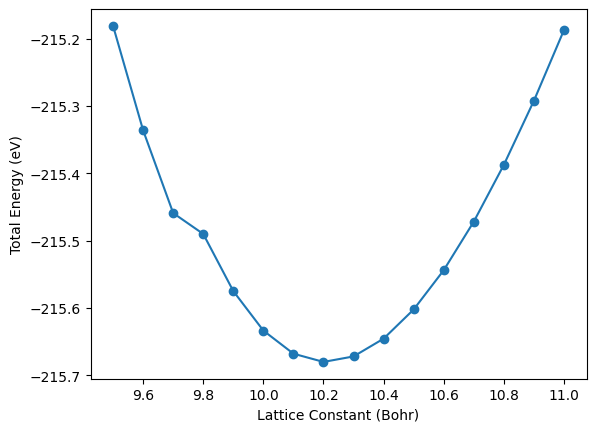

In [ ]:
fig,ax = plt.subplots()

ax.plot(lattice_constants, total_energies,'o-')
ax.set_xlabel('Lattice Constant (Bohr)')
ax.set_ylabel('Total Energy (eV)')

# k-points

In [ ]:
import numpy as np
# create a list for k points to be tested
kpoints = np.arange(1,6,1) # enter kpoints limits
# find the "lattice constant" line in the input file
lat_cons_index = qe_input.find('K_POINTS') + 20

total_energies = []
for k in kpoints:
  # update the input file with the new lattice constant
  new_input_file = qe_input[:lat_cons_index] + str(k).ljust(2) + str(k).ljust(2) + str(k).ljust(2) + qe_input[lat_cons_index+8:]
  # overwrite the input file
  with open("si.scf.in", "w") as f:
    f.write(new_input_file)

  ! /content/q-e/bin/pw.x  -in si.scf.in > si.scf.out # run the DFT input file

  output = ase.io.read("/content/silicon/si.scf.out") # read the output file

  total_energies.append(output.get_total_energy()) # record the calculated total energy

# computation time: 10 seconds

Text(0, 0.5, 'Total Energy (eV)')

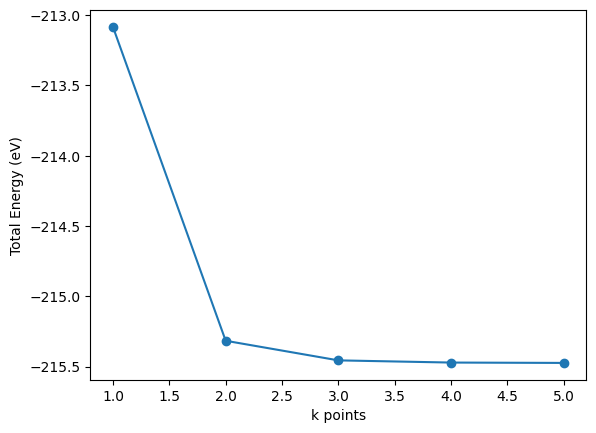

In [ ]:
fig,ax = plt.subplots()

ax.plot(kpoints, total_energies,'o-')
ax.set_xlabel('k points')
ax.set_ylabel('Total Energy (eV)')